
# Equations for motion

Note that these equations are taken from https://www.youtube.com/watch?v=HYJXygpd_J4&list=PLhwIOYE-ldwL6h-peJADfNm8bbO3GlKEy&index=37

These are the equations for motion. The last equation is simply there to convert the entire differential equations into a vector format.

$$
\begin{align*}

\frac {df(x(t), y(t), d(t))} {dt} &= 0 \\

\frac {\partial f} {\partial x} \frac {\partial x} {\partial t} +\frac {\partial f} {\partial y} \frac {\partial y} {\partial t} + \frac {\partial f} {\partial t}  &= 0 \\

f_xv_x +f_yv_y +f_t &= 0\\

\begin{pmatrix}
f_x & f_y
\end{pmatrix}

\begin{pmatrix}
v_x \\ v_y
\end{pmatrix}

+ f_t &= 0

\end{align*}
$$

Note the following: 

- $f_x$ represents the partial derivative of $f$ w.r.t. $x$, and can be represented by the `first_derivative` function that we have already encountered before. 
- $f_y$ represents the partial derivative of $f$ w.r.t. $y$, and can be represented by the `first_derivative` function that we have already encountered before. 
- $v_x$ and $v_y$ are the motions that we are interested in calculating
- $f_t$ represents the partial derivative of $f$ w.r.t. $t$


Remember that this is only for a single point. We will now write these equations for an $N \times N$ patch around the point of interest

Here, we will use the additional notation and introduce the picture coordinates $[i, j]$. Hence, if we assume that the above equation represents the $i$<sup>th</sup> and $j$<sup>th</sup> coordinates respectively, we will rewrite the equations as:

$$
\begin{pmatrix}
f^{[i, j]}_x & f^{[i, j]}_y
\end{pmatrix}

\begin{pmatrix}
v_x \\ v_y
\end{pmatrix}

+ f^{[i, j]}_t = 0
$$

For an $N+1 \times N+1$ patch the equations will change to the following:

$$
\begin{pmatrix}
f^{[i-N, j-N]}_x & f^{[i-N, j-N]}_y \\
     \vdots      &      \vdots      \\
f^{[i+N, j+N]}_x & f^{[i+N, j+N]}_y \\
\end{pmatrix}

\begin{pmatrix}
v_x \\ v_y
\end{pmatrix}

+ 

\begin{pmatrix}
f^{[i-N, j-N]}_t \\ 
\vdots \\ 
f^{[i+N, j+N]}_t \\ 
\end{pmatrix}

= \mathbf 0
$$

This equation can be written as the following:

$$
\mathbf A \mathbf v + \mathbf t = \mathbf 0
$$

We are going to optimize the function to minimize the equation for the lease amounht of $\mathbf v$

$$
\begin{align*}

E(\mathbf v)                                                &= \| \mathbf A \mathbf v + \mathbf t  \| ^2 \\

\frac {dE (\mathbf v) } {d \mathbf v}                       &= 2 \mathbf A^T( \mathbf A \mathbf v + \mathbf t  ) = 0  \\

2 \mathbf A^T( \mathbf A \mathbf v + \mathbf t  )           &= 0  \\

2 \mathbf A^T \mathbf A \mathbf v + 2 \mathbf A^T\mathbf t  &= 0  \\

\mathbf A^T \mathbf A \mathbf v + \mathbf A^T\mathbf t      &= 0  \\

\mathbf v                                                   &= - ( \mathbf A^T \mathbf A)^{-1}   \mathbf A^T\mathbf t    \\


\end{align*}
$$



Now we will break down this equation into its components:

First we will look at the $\mathbf A^{T} \mathbf A$ part. If we do the multiplication, we will get the following:

$$
\begin{align*}
\mathbf A^T \mathbf A &=  

\begin{pmatrix}
f^{[i-N, j-N]}_x & \ldots & f^{[i+N, j+N]}_y \\
f^{[i-N, j-N]}_x & \ldots & f^{[i+N, j+N]}_y \\
\end{pmatrix}

\begin{pmatrix}
f^{[i-N, j-N]}_x & f^{[i-N, j-N]}_y \\
     \vdots      &      \vdots      \\
f^{[i+N, j+N]}_x & f^{[i+N, j+N]}_y \\
\end{pmatrix}\\

&= 

\begin{pmatrix}
\sum f_x^2 & \sum f_xf_y \\
\sum f_xf_y & \sum f_y^2 \\
\end{pmatrix}

\end{align*}
$$






Now we will investigate the other part - $\mathbf A^{T} \mathbf t$ This can be written similarly as:

$$
\mathbf A^{T} \mathbf t = 
\begin{pmatrix}
\sum f_x f_t \\
\sum f_y f_t
\end{pmatrix}
$$

For this instance, we will use the folliwing specifications:

$$
\begin{align*}
f_x &= \left ( 0.5f_1 + 0.5f_2 \right ) \times d \times p  \\
f_y &= \left ( 0.5f_1 + 0.5f_2 \right ) \times p \times d  \\
f_t &= \left ( f_1 - f_2 \right ) \times p \times p  \\
\end{align*}
$$

Here, 

$$
\begin{align*}
d &= ( -1  & 1 ) \\
p &= ( 0.5 & 0.5 )
\end{align*}
$$

# Appendix 

## preparing slices from a video


In [2]:
import cv2, os
os.chdir('..')

In [3]:
video = 'data/raw_video/Road traffic video for object recognition.mp4'
out_folder = 'data/raw_video/sliced_videos'

In [4]:
cap = cv2.VideoCapture(video)
Nframes, i = 10, 0

while True:
    if i >= Nframes: break
    success, frame = cap.read()
    if not success: break
    filename = os.path.join(out_folder, f'{i:010d}.png')
    cv2.imwrite( filename, frame )
    i+= 1

cap.release()


In [6]:
import matplotlib.pyplot as plt

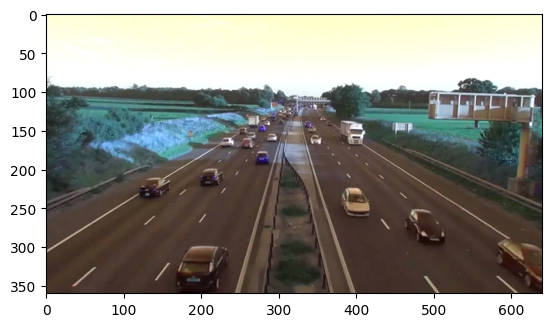

In [7]:
plt.imshow(frame)